# LGM Data Science Internship Programme

# Beginner Level Task-2

# Name of Project : Stock Market Prediction And Forecasting Using Stacked LSTM

# Dataset - https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [5]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [7]:
df['Date']=pd.to_datetime(df['Date'])
print(type(df.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [8]:
hf=df.sort_values(by='Date')
hf.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [9]:
hf.reset_index(inplace=True)

In [10]:
hf.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


# Visualization

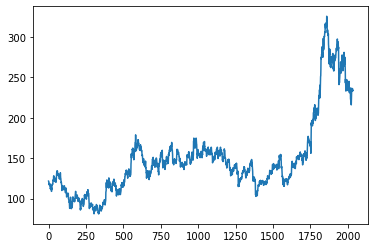

In [11]:
plt.plot(hf['Close'])

In [13]:
jf=hf['Close']
jf

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

In [104]:
scaler=MinMaxScaler(feature_range=(0,1))
jf=scaler.fit_transform(np.array(jf).reshape(-1,1))
jf

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [105]:
Training_Size=int(len(jf)*0.70)
Test_Size=len(jf)-Training_Size
Train_Data,Test_Data=jf[0:Training_Size,:],jf[Training_Size:len(jf),:1]

In [106]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range (len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [107]:
Time_Step = 100
X_Train, y_Train = create_dataset(Train_Data, Time_Step)
X_Test, yTest = create_dataset(Test_Data, Time_Step)

In [108]:
print(X_Train.shape), print(y_Train.shape)

(1323, 100)
(1323,)


(None, None)

In [109]:
print(X_Test.shape), print(yTest.shape)

(510, 100)
(510,)


(None, None)

In [110]:
X_Train = X_Train.reshape(X_Train.shape[0],X_Train.shape[1] , 1)
X_Test = X_Test.reshape(X_Test.shape[0],X_Test.shape[1] , 1)

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [100]:
mode1=Sequential()
mode1.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
mode1.add(LSTM(50,return_sequences=True))
mode1.add(LSTM(50))
mode1.add(Dense(1))
mode1.compile(loss='mean_squared_error',optimizer='adam')
mode1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_8 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_9 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [101]:
mode1.fit(X_Train,y_Train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
19/19 [==============================] - 25s 492ms/step - loss: 0.0103 - val_loss: 0.0024
Epoch 2/60
19/19 [==============================] - 6s 315ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 3/60
19/19 [==============================] - 5s 242ms/step - loss: 9.8459e-04 - val_loss: 0.0012
Epoch 4/60
19/19 [==============================] - 5s 237ms/step - loss: 8.9409e-04 - val_loss: 0.0012
Epoch 5/60
19/19 [==============================] - 5s 250ms/step - loss: 8.4373e-04 - val_loss: 0.0011
Epoch 6/60
19/19 [==============================] - 5s 282ms/step - loss: 8.3233e-04 - val_loss: 0.0011
Epoch 7/60
19/19 [==============================] - 6s 300ms/step - loss: 8.1035e-04 - val_loss: 0.0010
Epoch 8/60
19/19 [==============================] - 5s 254ms/step - loss: 7.5981e-04 - val_loss: 9.3943e-04
Epoch 9/60
19/19 [==============================] - 5s 244ms/step - loss: 7.3091e-04 - val_loss: 8.7662e-04
Epoch 10/60
19/19 [==============================] - 5s 239ms/s

In [102]:
Test_predict=mode1.predict(X_Test)

In [111]:
Test_predicted=scaler.inverse_transform(Test_predict)
Test_predicted

array([[0.24694183],
       [0.24747822],
       [0.2439133 ],
       [0.23318453],
       [0.22584699],
       [0.22406772],
       [0.22961217],
       [0.23683782],
       [0.2385329 ],
       [0.2357782 ],
       [0.2333312 ],
       [0.23751381],
       [0.24185301],
       [0.24886021],
       [0.25815642],
       [0.251014  ],
       [0.23953469],
       [0.23680282],
       [0.24062002],
       [0.26195115],
       [0.28215414],
       [0.2909182 ],
       [0.28953713],
       [0.27857223],
       [0.27629274],
       [0.27769437],
       [0.28180352],
       [0.28970757],
       [0.2928624 ],
       [0.29130298],
       [0.29085624],
       [0.28569958],
       [0.27238145],
       [0.24914424],
       [0.23454967],
       [0.23181412],
       [0.23436968],
       [0.23186626],
       [0.22122723],
       [0.20435208],
       [0.19246519],
       [0.18784557],
       [0.18134968],
       [0.17853372],
       [0.17126074],
       [0.16085397],
       [0.15706442],
       [0.156

In [117]:
import math
from sklearn.metrics import mean_squared_error

In [118]:
performance = math.sqrt(mean_squared_error(yTest,Test_predict))
performance

0.05550210985988073